Qn 1:Predict price of a mercedez benz that is 4yr old with mileage 45000
   2:Predict price of a BMW X5 that is 7yr old with mileage 86000
   3:Tell me the score(accuracy)of yor model.(Hint: Use Linear Reg().score())

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('/home/anu/Downloads/cars_nlp.csv',sep='\t')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


/home/anu/yes/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


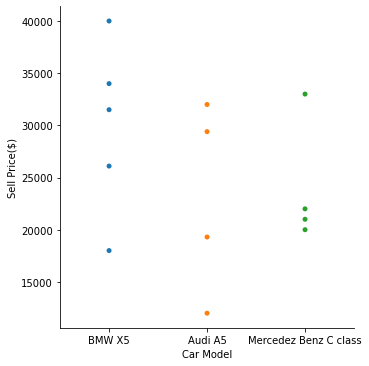

In [3]:
import seaborn as sns
sns.catplot("Car Model","Sell Price($)",data=df,jitter=False)
#jitter denotes magnitude,and here donot need jitter ,so set as false


/home/anu/yes/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


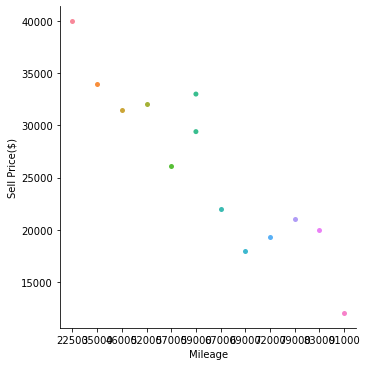

In [4]:
sns.catplot("Mileage","Sell Price($)",data=df,jitter=False)
#Expensive cars have lowest mileage

In [17]:
dummies=pd.get_dummies(df['Car Model'])#getting dummy variable for column "town"
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [18]:
merged=pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [7]:
final=merged.drop(['Car Model','Mercedez Benz C class'],axis='columns')
#Dropping these columns to avoid dummy variable trap
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [19]:
X=final.drop('Sell Price($)',axis='columns')
#X

In [20]:
y=final['Sell Price($)']
#y

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [11]:
model.fit(X,y)

LinearRegression()

In [12]:
model.score(X,y)

0.9417050937281083

In [13]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [14]:
model.predict([[86000,7,0,1]])

array([11080.74313219])